In [1]:
!gdown --id 17COTYjTfLYN4wZUnWgthuAeXwtPUbj6I

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=17COTYjTfLYN4wZUnWgthuAeXwtPUbj6I
From (redirected): https://drive.google.com/uc?id=17COTYjTfLYN4wZUnWgthuAeXwtPUbj6I&confirm=t&uuid=c41062d3-99f0-45df-9191-2ac8f12f376f
To: /content/archive (3).zip
100% 33.9M/33.9M [00:00<00:00, 154MB/s]


In [2]:
import zipfile
zip_file = "/content/archive (3).zip"
target_folder = "/content/data"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [3]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/data/LMIGuardianEvt.Dll
/content/data/imdb_urdu_reviews_test.csv
/content/data/imdb_urdu_reviews_train.csv


In [4]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
!pip install --upgrade scikit-learn

In [6]:
train =  pd.read_csv('/content/data/imdb_urdu_reviews_train.csv')
test =   pd.read_csv('/content/data/imdb_urdu_reviews_test.csv')
print('Shape of Training Set ' , train.shape,'\nShape of Testing Set ', test.shape)

Shape of Training Set  (40000, 2) 
Shape of Testing Set  (10000, 2)


In [7]:
data =  pd.concat([train, test]).reset_index(drop=True)
print(data.shape)

(50000, 2)


In [8]:
df =  data.copy()

In [9]:
df.head(20)

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
5,مجھے اس فلم کا بیشتر حصہ پسند آیا۔ جیسا کہ دوس...,negative
6,ٹھیک ہے ، شاید یہ آسکر کا مستحق نہیں ہے۔ یا گو...,positive
7,میں نے اسے سائنس فائی چینل پر دیکھا۔ یہ پہلے و...,negative
8,یہ فلم ایک ناقص مووی تھی۔ پلاٹ خراب تھا اور کا...,negative
9,یہ ایم جی ایم اور فرینک سناتراس بدترین فلموں م...,negative


In [10]:
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

texts = df['review'].tolist()
labels = df['encoded_sentiments'].tolist()

In [11]:
df.head()

,review,sentiment,encoded_sentiments
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive,1
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative,0
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive,1
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative,0
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive,1


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to one-hot encoding
labels = np.array(labels)
one_hot_labels = np.zeros((len(labels), 2))
one_hot_labels[np.arange(len(labels)), labels] = 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

# Define the BiLSTM model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
1250/1250 [==============================] - 537s 423ms/step - loss: 0.5208 - accuracy: 0.7451 - val_loss: 0.4959 - val_accuracy: 0.7658
Epoch 2/5
1250/1250 [==============================] - 496s 397ms/step - loss: 0.3702 - accuracy: 0.8404 - val_loss: 0.5120 - val_accuracy: 0.7026
Epoch 3/5
1250/1250 [==============================] - 436s 349ms/step - loss: 0.2089 - accuracy: 0.9230 - val_loss: 0.2979 - val_accuracy: 0.8819
Epoch 4/5
1250/1250 [==============================] - 470s 376ms/step - loss: 0.1031 - accuracy: 0.9656 - val_loss: 0.3268 - val_accuracy: 0.8824
Epoch 5/5
1250/1250 [==============================] - 427s 342ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.4128 - val_accuracy: 0.8625


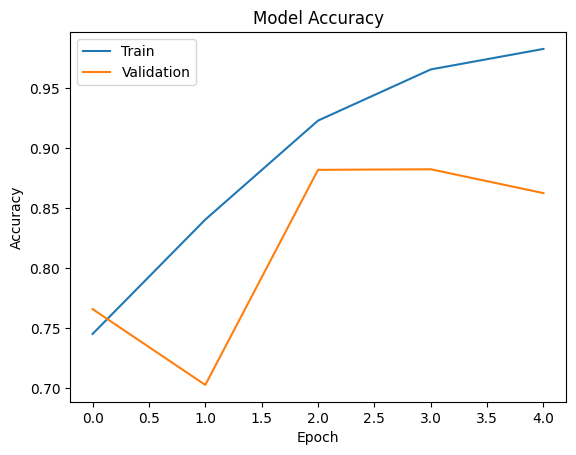

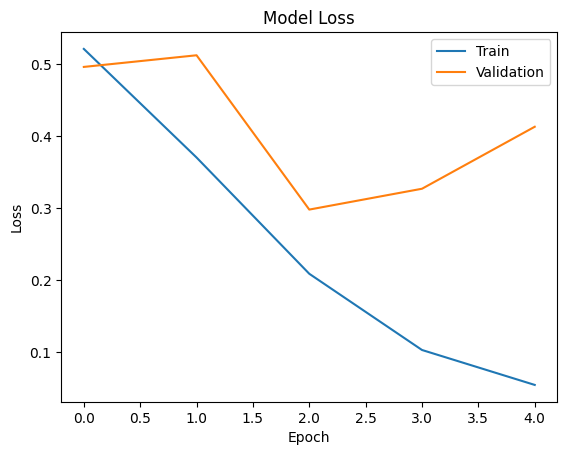

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 56s 170ms/step
F1 score: 0.8716752216518898
Precision: 0.8328874621009452


In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
model.save("my_model.h5")
from sklearn.metrics import f1_score, precision_score

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

f1 = f1_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)

print("F1 score:", f1)
print("Precision:", precision)